# Loading dataset Cranfield

In [ ]:
!git clone "https://github.com/Vinhnv0901/search-engines-vector-model-LSI-model.git"

In [ ]:
%cd search-engines-vector-model-LSI-model
!ls

/content/search-engines-vector-model-LSI-model/search-engines-vector-model-LSI-model
Cranfield  image  README.md  TEST  Vector_model.ipynb


In [ ]:
import os
import string
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the path to the directory containing the document files
dataset_path = "Cranfield"

# Initialize variables for counting terms and document appearances
term_counts = defaultdict(int)
term_document_count = defaultdict(int)

# Iterate over each document file
for filename in os.listdir(dataset_path):
    if filename.endswith(".txt"):
        filepath = os.path.join(dataset_path, filename)
        with open(filepath, "r") as f:
            # Read the content of the document
            content = f.read().lower()

            # Remove punctuation and split into words
            translator = str.maketrans("", "", string.punctuation)
            words = content.translate(translator).split()

            # Count term occurrences in the document
            term_occurrences = set()
            for word in words:
                term_counts[word] += 1
                term_occurrences.add(word)

            # Update the document count for each term
            for term in term_occurrences:
                term_document_count[term] += 1

# Display the number of terms
num_terms = len(term_counts)
print("Number of terms:", num_terms)

Number of terms: 7909


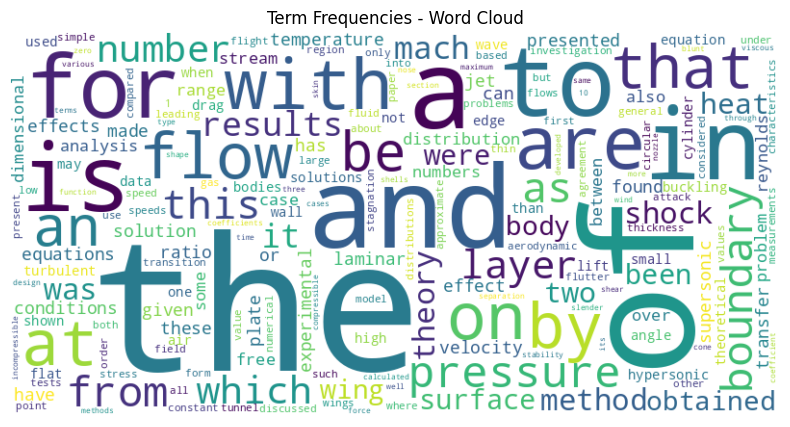

In [ ]:

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Term Frequencies - Word Cloud")
plt.show()


# Preprocessing

In [ ]:
from sklearn import preprocessing
import nltk
import os
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords


term_freq = {}# số lần xuất hiện của các term cả tài liệu Cranfield
doc_freq = {}# số tài liệu xuất hiện của các term mà ta xét
ps = PorterStemmer()
noise = string.punctuation + '0123456789'


nltk.download('stopwords')
stop_words = stopwords.words('english')

def preProcessing(content):
  # loại bỏ ký hiệu và số tách thành mãng
  words = content.translate(str.maketrans("", "", noise)).split()
  # stemming
  words = [ps.stem(i) for i in words]
  # loại bỏ stopwords
  words = [word for word in words if word not in stop_words]
  return words




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
content ="The research paper discusses the impact of various factors on the performance of the system."
words = content.split()
res = [word for word in words if word not in stop_words]
print(res)

['The', 'research', 'paper', 'discusses', 'impact', 'various', 'factors', 'performance', 'system.']


In [ ]:
document = []
file_names = []
dataset_path = "Cranfield"

# Get the list of file names in the folder
file_names = [filename for filename in os.listdir(dataset_path) if filename.endswith(".txt")]

# Sort the file names in ascending order
file_names.sort(key=lambda x: int(os.path.splitext(x)[0]))

# Read the documents in ascending order
for filename in file_names:
    filepath = os.path.join(dataset_path, filename)
    with open(filepath, "r") as f:
        content = f.read().lower()
        # Remove punctuation and split into words
        document.append(preProcessing(content))

In [ ]:
file_names

In [ ]:
document[1]

# LSI Model

## Decomposition

In [ ]:
# #import modules
# from gensim import corpora
# from gensim.models import LsiModel
# from gensim.models.coherencemodel import CoherenceModel
# import matplotlib.pyplot as plt
# import numpy as np


# def prepare_corpus(doc_clean):
#     """
#     Input  : clean document
#     Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
#     Output : term dictionary and Document Term Matrix
#     """
#     # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
#     dictionary = corpora.Dictionary(doc_clean)
#     # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
#     doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
#     # generate LDA model
#     return dictionary,doc_term_matrix



In [ ]:
# # Pass doc_clean as the parameter to prepare_corpus function
# dictionary, doc_term_matrix = prepare_corpus(document)


In [ ]:
#import modules
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
import numpy as np


def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our corpus and convert the list of documents (corpus) into Document Term Matrix using tf-idf weighting
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our corpus, where every unique term is assigned an index.
    dictionary = corpora.Dictionary(doc_clean)

    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

    # Apply tf-idf weighting to the Document Term Matrix
    tfidf = TfidfModel(doc_term_matrix)
    doc_term_matrix_tfidf = tfidf[doc_term_matrix]

    return dictionary, doc_term_matrix_tfidf

# Pass doc_clean as the parameter to prepare_corpus function
dictionary, doc_term_matrix = prepare_corpus(document)


In [ ]:
dictionary

In [ ]:
# Convert doc_term_matrix into a dense numpy array
num_terms = len(dictionary)
num_docs = len(doc_term_matrix)
matrix = np.zeros((num_terms, num_docs), dtype=np.float32)  # Transpose the dimensions

for i, doc in enumerate(doc_term_matrix):
    for term_id, term_freq in doc:
        matrix[term_id, i] = term_freq

In [ ]:
matrix.shape

(4421, 1400)

In [ ]:
def svd_decomposition(matrix):
    """
    Perform Singular Value Decomposition (SVD) on the given matrix M.

    Parameters:
        matrix: Input matrix of shape (m x n)

    Returns:
        S: Matrix of left singular vectors of shape (m x n)
        sigma: Singular values as a 1-D array of length min(n, n)
        U: Transpose of the matrix of right singular vectors of shape (n x n)
    """
    # Perform SVD
    S, sigma, U_t = np.linalg.svd(matrix, full_matrices=False)


    return S, sigma, U_t

In [ ]:
S, sigma, U_t = svd_decomposition(matrix)

In [ ]:
S.shape

(4421, 1400)

In [ ]:
S

array([[-0.04857101, -0.02242694,  0.07122051, ..., -0.00647338,
         0.00110177, -0.04803153],
       [-0.01886846,  0.00523219,  0.0014428 , ...,  0.02913155,
         0.00684364,  0.00797259],
       [-0.07468449,  0.01600269,  0.13435355, ...,  0.0105191 ,
         0.01753739,  0.01773542],
       ...,
       [-0.00059519, -0.00279975, -0.00131393, ..., -0.00307895,
        -0.00898541,  0.00468559],
       [-0.00102486, -0.00449228, -0.00259727, ...,  0.00148687,
         0.01709494, -0.00192047],
       [-0.00048342, -0.00315819, -0.00136527, ..., -0.00569332,
         0.00073474, -0.00174783]], dtype=float32)

In [ ]:
sigma.shape

(1400,)

In [ ]:
U_t.shape

(1400, 1400)

## Fiding optimal K topics

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics= num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
# def plot_graph(doc_clean,start, stop, step):
#     dictionary,doc_term_matrix=prepare_corpus(doc_clean)
#     model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
#                                                             stop, start, step)
#     # Show graph
#     x = range(start, stop, step)
#     plt.plot(x, coherence_values)
#     plt.xlabel("Number of Topics")
#     plt.ylabel("Coherence score")
#     plt.legend(("coherence_values"), loc='best')
#     plt.show()

# start,stop,step=2,40,1
# plot_graph(document, start, stop, step)

In [ ]:
k = 320

## Reduce dimension

In [ ]:
def reduce_dimension(S, sigma, UT, k):
    """
    Reduce the dimensionality of matrices U, S, and V based on a given value of k.

    Parameters:
        U: Matrix of left singular vectors of shape (m x n)
        S: Singular values as a 1-D array of length n
        V: Matrix of right singular vectors of shape (n x n)
        k: Number of singular values/vectors to retain

    Returns:
        U_red: Reduced matrix U of shape (m x k)
        S_red: Reduced array of singular values of length k
        V_red: Reduced matrix V of shape (k x n)
    """
    S_red = S[:, :k]
    sigma_red = sigma[:k]
    UT_red = UT[:k, :]
    return S_red, sigma_red, UT_red

In [ ]:
S_red, sigma_red, UT_red = reduce_dimension(S, sigma, U_t, k)

In [ ]:
S_red.shape

(4421, 320)

In [ ]:
sigma_red.shape

(320,)

In [ ]:
UT_red.shape

(320, 1400)

# Calculate querry matrix

In [ ]:
file_path = 'TEST/query.txt'
def read_queries_from_file(file_path):
    queries = []
    with open(file_path, 'r') as file:
        for line in file:
            query = line.strip()
            preprocessed_query = preProcessing(query)
            query_new = " ".join(preprocessed_query)
            queries.append(query_new)
    return queries

queries = read_queries_from_file(file_path)
print(queries)

['similar law must obey construct aeroelast model heat high speed aircraft', 'structur aeroelast problem associ flight high speed aircraft', 'problem heat conduct composit slab solv far', 'criterion develop show empir valid flow solut chemic react ga mixtur base simplifi assumpt instantan local chemic equilibrium', 'chemic kinet system applic hyperson aerodynam problem', 'theoret experiment guid turbul couett flow behaviour', 'possibl relat avail pressur distribut ogiv forebodi zero angl attack lower surfac pressur equival ogiv forebodi angl attack', 'method dash exact approxim dash present avail predict bodi pressur angl attack', 'paper intern slip flow heat transfer studi', 'realga transport properti air avail wide rang enthalpi densiti', 'possibl find analyt similar solut strong blast wave problem newtonian approxim', 'aerodynam perform channel flow ground effect machin calcul', 'basic mechan transon aileron buzz', 'paper shocksound wave interact', 'materi properti photoelast materi

In [ ]:
def cal_vector_K(S_red, sigma_red):
  vector_K = np.dot(S_red, np.diag(sigma_red))

  return vector_K


In [ ]:
def cal_vector_D(sigma_red, UT_red):
  vector_D = np.dot(np.diag(sigma_red), UT_red)

  return vector_D

In [ ]:
D = cal_vector_D(sigma_red, UT_red)

In [ ]:
K = cal_vector_K(S_red, sigma_red)

In [ ]:
def cal_vector_querry(query, K):
    query_terms = query.split()
    query_vector = np.zeros(K.shape[1])  # Initialize query vector as zeros

    for term in query_terms:
        if term in dictionary.token2id:
            term_index = dictionary.token2id[term]
            query_vector += K[term_index]

    return query_vector

In [ ]:
list_q = []
for query in queries:
  q = cal_vector_querry(query, K)
  list_q.append(q)


# Calculate cosine similarity

In [ ]:
import numpy as np
from numpy.linalg import norm

def calculate_cosine_similarity(query, document):
    # Compute the dot product of the query and document vectors
    dot_product = np.dot(query, document)

    # Compute the norms of the query and document vectors
    query_norm = norm(query)
    document_norm = norm(document)

    # Compute the cosine similarity
    similarity = dot_product / (query_norm * document_norm)

    return similarity

In [ ]:
predict_results = []
k = 400
for q_idx in range(0, len(list_q)):
  doc_similarity = []

  for doc_idx in range(0, len(document)):
    sim = calculate_cosine_similarity(list_q[q_idx], D[:, doc_idx])
    doc_similarity.append((doc_idx+1, sim))

  ranked_doc = sorted(doc_similarity, key=lambda x: x[1], reverse=True)
  top_k_docs = [item[0] for item in ranked_doc[:k]]

  predict_results.append(top_k_docs)
  # predict_results.append(ranked_doc)



# np.savetxt('/content/output.txt', predict_results, fmt='%g')






# Evaluate

In [ ]:
RES = 'TEST/RES'

# Sắp xếp lại các file kết quả do các file kết quả không được gọi đúng thứ tự
list_file_real_results = os.listdir(RES)
list_sort = [int(list_file_real_results[i][0:-4]) for i in range(len(list_file_real_results))]
list_sort.sort()
list_file_real_results = [str(i) + '.txt' for i in list_sort]

# chứa các kết quả đúng của các câu truy vấn
real_results = []
for filename in list_file_real_results:
    if filename.endswith(".txt"):
        filepath = os.path.join(RES, filename)
        with open(filepath, "r") as f:
            col2 = [int(line.strip().split()[1]) for line in f]
            real_results.append(col2)
            f.close()


In [ ]:
predict_results[0]

[486, 51, 435, 1263, 12, 13, 283, 184, 876, 142, 102, 606]

In [ ]:
# Kiểm tra tài liều đó có nằm trong tài liệu thực không truy vẫn thực không ---> danh sách true false của tài liệu truy vấn của mình(OK)
# tính từng cặp r và p ----> bảng r p
# tính AP của từng câu truy vấn
# cuối cùng tính MAP
# lấy dữ liệu RES để tính MAP nhưng chưa xong--------


#Hàm lấy index true
def index_true(lis):
  return [i for i in range(len(lis)) if lis[i] == True]

# Hàm này dùng để tính R và P của các câu truy vấn
def RP(real_results, predict_results):

#Tính R và P của từng câu truy vấn
  check_results = [[predict_results[i][j] in real_results[i] for j in range(len(predict_results[i]))] for i in range(len(predict_results))]# kiểm tra xem câu tìm được có đúng kết quả không
  index_true_results = [index_true(i) for i in check_results]#đây là index của các dự đoán đúng dùng để tính độ chính xác Precision
  len_results = [len(i) for i in real_results]#số kết quả "thực" tìm được của mỗi câu truy vấn để tính độ phủ Recall
  R_P_results = [[((j+1)/len_results[i], (j+1)/(index_true_results[i][j]+1)) for j in range(len(index_true_results[i]))] for i in range(len(index_true_results))]#kết quả R và P của mỗi câu truy vấn
  return R_P_results

def Recall(real_results, predict_results):
  check_results = [[predict_results[i][j] in real_results[i] for j in range(len(predict_results[i]))] for i in range(len(predict_results))]# kiểm tra xem câu tìm được có đúng kết quả không
  len_results = [len(i) for i in real_results]#số kết quả "thực" tìm được của mỗi câu truy vấn
  recall = [(check_results[i].count(True))/len_results[i] for i in range(len(check_results)) if check_results[i]]
  return sum(recall)/len(real_results)

def Precision(real_results, predict_results):
  check_results = [[predict_results[i][j] in real_results[i] for j in range(len(predict_results[i]))] for i in range(len(predict_results))]# kiểm tra xem câu tìm được có đúng kết quả không
  len_predict = [len(i) for i in predict_results]#số kết quả "dự đoán" tìm được của mỗi câu truy vấn
  precision = [(check_results[i].count(True))/len_predict[i] for i in range(len(check_results)) if check_results[i]]
  return sum(precision)/len(real_results)

R_P_results = RP(real_results, predict_results)



# đây là 11 điểm nội suy của TREC
R = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

#Tính AP của từng câu truy vấn từ R_P_results
# P nội suy là Max(Pr') trong đó r'>=r(đang xét)

#hàm check_r dùng để kiểm tra và lấy ra index của r trong rp
# Lấy index của R đang xét để tìm giá trị P max từ index đó trở về sau
def check_r(r, rp):
  for i in range(len(rp)):
    if rp[i][0]>=r:
      return i
  return -1
# Lấy P max
def max_P(check, rp):
  maxx = 0
  for i in rp[check:]:
    if i[1]>maxx:
      maxx = i[1]
  return maxx


def MAP_11(R_P_results, R):

  AP_results = []
  for i in range(len(R_P_results)):
    ap = 0
    for j in range(11):
      Check = check_r(R[j],R_P_results[i])
      if Check != -1:
        ap = ap + max_P(Check,R_P_results[i])
    AP_results.append(ap/11)

  MAP = sum(AP_results)/225
  return MAP

MAP_11(R_P_results, R), Recall(real_results, predict_results), Precision(real_results, predict_results)


(0.33444847208071693, 0.9161248083046595, 0.018522222222222207)